# Assignment 1 Machine Learning 
# 48516 Isabel Mora Labarca

This assignment will contain 3 questions with details as below. The due date is Feburary 27 (Sunday), 2022 23:59PM. Each late day will result in 20% loss of total points.

In [37]:
# Imports
import numpy as np
import pandas as pd
import sys
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

## Question 1  (20 points) Make a plan before running your model

Joana Gonzales is a young professional looking to diversify her investment portfolio. Joana graduated with a Masters in Business Analytics, and after four successful years as a product manager in a tech company, she has managed to save a sizable amount of money. She now wants to start diversifying her savings portfolio. So far, she has focused on traditional investments (stocks, bonds, etc.) and she now wants to look further afield. One asset class she is particularly interested in is peer-to-peer loans issued on online platforms. The high returns advertised by these platforms seem to be an attractive value proposition, and Joana is especially excited by the large amount of data these platforms make publicly available. With her data science background, she is hoping to apply machine learning tools to these data to come up with lucrative investment strategies. 

Peer-to-peer lending refers to the practice of lending money to individuals (or small businesses) via online services that match anonymous lenders with borrowers. Lenders can typically earn higher returns relative to savings and investment products offered by banking institutions. However, there is of course the risk that the borrower defaults on his or her loan. Interest rates are usually set by an intermediary platform on the basis of analyzing the borrower's credit (using features such as FICO score, employment status, annual income, debt-to-income ratio, number of open credit lines). The intermediary platform generates revenue by collecting a one-time fee on funded loans (from borrowers) and by charging a loan servicing fee to investors.

The peer-to-peer lending industry in the United States started in February 2006 with the launch of Prosper, followed by LendingClub. In 2008, the Securities and Exchange Commission (SEC) required that peer-to-peer companies register their offerings as securities, pursuant to the Securities Act of 1933. Both Prosper and LendingClub gained approval from the SEC to offer investors notes backed by payments received on the loans. One of the interesting features of the peer-to-peer lending market is the richness of the historical data available. The two largest U.S. platforms (LendingClub and Prosper) have chosen to give free access to their data to potential investors. The definition of each loan status is as follows. Current refers to a loan that is still being reimbursed in a timely manner. Late corresponds to a loan on which a payment is between 16 and 120 days overdue. If the payment is delayed by more than 121 days, the loan is considered to be in Default. 



If you were Joana, your job is to define investment strategies. Given your knowledge of data science, below you need to write a plan (~300 words), using the steps specified from business problem to machine learning problem. Writing down in the below cell using Markdown.

Type you answerr below:




###### Joana’s Plan from Business Problem to Machine Learning Problem
1.	**Decide if machine learning is needed.** It would be hard to manually process each loan. Data is abundant, somewhat unstructured and humans would not be able to define patterns to set rules. Thus, task needs automation  ML is an option.
2.	**Define the business problem.** Since this particular asset class has higher risk to default, if I were Joana, I would start by predicting which ones will default (later focus on maximizing returns). Given loan data, predict which loan will default.
3.	**Data collection.** Thankfully, Joana has a rich meaningful dataset provided. Important is to verify data size and whether data is labeled (if not, only option is Unsupervised learning)
4.	**Find patterns** and common statistics from that dataset (mean, mode, quantiles, NaN values, frequency distributions through histograms). Verify data quality through identification of outliers and possible wrong values. Then, generate scatterplots of variables highly correlated is necessary. The idea is to identify if there are any very similar variables (to avoid multicollinearity in the model), as well as how they relate to the target variable. Lastly, apply techniques to deal with missing values such as replacing by mean or mode, or decide to drop the column if too many missing values. 
5.	Check whether **features are meaningful**. After the data curation, feature engineering would be the next step, i.e normalization, converting strings categories to dummy variables or converting continuous variables to categorical (OneHotEncoder, binning, StandardScaler...) 
6.	**Evaluate success.** Idenitfy a success metric to evaluate model performance. If Joana wants to reduce the risk of default loans classified as non-default, weighted accuracy or precision would be some options (important to check for class imbalances).
7.	**Train model**: Divide data in train and test set. Select ~4 classification models. Target is "Current", "Late" and "Default", a multiclass classification problem, or a binary (by making Late and Default same class) is ideal. This depends on how risk averse is Joana. We could train Decision Trees, Random Forest, kNN and Softmax Regression and she could later use GridSearchCV to optimize hyperparameters for each model. Print confusion matrix for the models for evaluation, iterate training process to look for improvment. Select best model based on following: Accuracy, interpretability, fast, scalability.


Advantages of classification models:
- Feature importance and explainability in the model vs. clustering - hard to explain, needs business expertise, harder to maintain and evaluation is abstract

## Question 2 (50 points) Zestimate this house

Purchasing a house is a very big decision for most of us. Companies such as Zillows collected tons of data regarding the listing and sold price of American houses and build the predictive model, named *Zestimate*. You are expected to build a model similar as Zestimate to predict house price in Boston. 
![zestimate](https://i0.wp.com/www.housesoldeasy.com/wp-content/uploads/Screen-Shot-2016-08-15-at-7.22.09-PM.png?resize=300%2C258&ssl=1)

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
dataset = load_boston()
X, y = load_boston(return_X_y=True)

#### Question 2.1 (10 points) 
Create train and test set, each contains 80% and 20% of the dataset, respectively, using *train_test_split* function in scikit-learn. Train a linear model on the train set and evaluate on the test set, report the training error and test error, respectively (as mean squared error).

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(f"Regression intercept: {lin_reg.intercept_}") 
print(f"Regression coefficients: {lin_reg.coef_}")

# Evaluate the model
y_train_predict = lin_reg.predict(X_train)
y_test_predict = lin_reg.predict(X_test)
train_error = (mean_squared_error(y_train_predict, y_train))
test_error = (mean_squared_error(y_test_predict, y_test))

# Print results
print(f"Training error (MSE): {train_error}")
print(f"Test error (MSE): {test_error}")

Regression intercept: 30.246750993923946
Regression coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
Training error (MSE): 21.641412753226312
Test error (MSE): 24.291119474973456


#### Question 2.2 (10 points)

Perform a 10-fold cross-validation on the whole data set. Show the averaged mean sqaured error on both train and test set at each fold, explain your findings.

In [3]:
from sklearn.model_selection import cross_validate
import numpy as np
cv_scores = cross_validate(lin_reg, X, y, scoring="neg_mean_squared_error", cv=10, return_train_score = True)

# Display MSE on train and test set at each fold
cv_scores_df = pd.DataFrame(cv_scores) 
print(cv_scores_df)

# Calculate averaged MSE for both train and test sets
avg_train_error = (np.mean(cv_scores["train_score"]))
avg_test_error = (np.mean(cv_scores["test_score"]))
                  
print(f"The cross-validation average MSE for the train set is: {-avg_train_error}")
print(f"The cross-validation average MSE for the test set is: {-avg_test_error}")


# We can look at Root Mean Squared Error (RMSE) for further analysis (not required by the question)
print(f"The cross-validation average RMSE for the train set is: {np.sqrt(-avg_train_error)}")
print(f"The cross-validation average RMSE for the test set is: {np.sqrt(-avg_test_error)}")

   fit_time  score_time  test_score  train_score
0  0.002002    0.000975   -9.286947   -23.363228
1  0.001000    0.000000  -14.151283   -22.882034
2  0.000000    0.001000  -14.073606   -23.216075
3  0.001026    0.000000  -35.206924   -20.771703
4  0.001011    0.000000  -31.885117   -21.335426
5  0.001001    0.000998  -19.835878   -22.363700
6  0.001005    0.000000   -9.947269   -23.327221
7  0.001000    0.000000 -168.375380   -11.959197
8  0.001000    0.001000  -33.329745   -21.586295
9  0.001000    0.001001  -10.960411   -23.189043
The cross-validation average MSE for the train set is: 21.39939241710581
The cross-validation average MSE for the test set is: 34.705255944524815
The cross-validation average RMSE for the train set is: 4.625947731774086
The cross-validation average RMSE for the test set is: 5.891116697581607


##### Comment: 

"Scikit-Learn cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of the MSE (i.e., a negative value), which is why the preceding code computes -scores before calculating the square root." (p. 70, Géron 2017). As a result, I added a negative sign to the errors before being displayed.

##### Findings:
The test error is slightly higher than the training error, which is what is expected since the model was trained on the training data. Thus, the test error in some way represents how the model would behave with unseen data. When looking at the RMSE, we can see that the difference is not that high and there doesn't seem to be signs of overfitting. An interesting observation is that with cross-validation we have a higher test error than with splitting the data. This could be because when splitting the data, we randomly selected in the 80% of the training data more instances "similar" to those remaining in the test set -- "the results can depend on a particular random choice for the pair of (train, validation) sets". To overcome that problem, k-fold cross validation selects k folds of the whole data, trains the model on k-1 folds and takes as test the remaining fold. Thus, it is also important to look at each fold scores (it may happen that only one fold has a very good/bad score and affects the average of our results). For example, the fold in index #7 seems to have fitted more on the training set and returned a very high error on the test set (-168). This might explain why in this case our test error is higher.

#### Question 2.3 (10 points) 
 
Add 2-degree squared polynomial features (with no interactions) and perform 10-fold cross-validation on the whole data set. Show the mean sqaured error on both train and test set at each fold, explain your findings.

Hint: you may use sklearn.preprocessing.PolynomialFeatures and check how it produces the polynomial features with/without interaction terms

In [4]:
# We can manually create our polynomial features since we don't want interaction terms produced by sklearn.PolynomialFeatures
import sys
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
X_2nd = np.hstack((X, X**2))  # our features + 2nd degree features (as clarified in Teams)
X_2nd.shape

(506, 26)

In [5]:
# Instantiate our model
lin_reg_polydata = LinearRegression()

# Perform cross-validation 
cv_scores_2nd_data = cross_validate(lin_reg_polydata, X_2nd, y, scoring="neg_mean_squared_error", cv=10, return_train_score = True)

# Display MSE on train and test set at each fold
cv_scores_2nd_df = pd.DataFrame(cv_scores_2nd_data) 
print(cv_scores_2nd_df)

# Calculate averaged MSE for both train and test sets
avg_train_error_2data = (np.mean(cv_scores_2nd_data["train_score"]))
avg_test_error_2data = (np.mean(cv_scores_2nd_data["test_score"]))
                  
print(f"The cross-validation average MSE for the train set is: {-avg_train_error_2data}")
print(f"The cross-validation average MSE for the test set is: {-avg_test_error_2data}")

# Calculate RMSE (not required by the question, just by curiosity)
print(f"The cross-validation average RMSE for the train set is: {np.sqrt(-avg_train_error_2data)}")
print(f"The cross-validation average RMSE for the test set is: {np.sqrt(-avg_test_error_2data)}")

   fit_time  score_time  test_score  train_score
0  0.001000    0.001005  -10.091861   -14.980271
1  0.000997    0.000000   -8.791095   -14.969661
2  0.000000    0.001000  -11.458221   -15.204169
3  0.000998    0.000000  -22.518524   -13.665059
4  0.000985    0.000000  -14.223065   -14.438738
5  0.001000    0.001001   -8.780146   -14.940824
6  0.001000    0.000000  -12.953433   -14.859624
7  0.000000    0.000999 -104.037379    -7.419826
8  0.001000    0.000000  -13.610872   -14.605032
9  0.000000    0.001000  -50.771795   -14.050919
The cross-validation average MSE for the train set is: 13.913412317032263
The cross-validation average MSE for the test set is: 25.723639177011655
The cross-validation average RMSE for the train set is: 3.7300686745731992
The cross-validation average RMSE for the test set is: 5.071847708381203


Additionally, as indicated by the question's hint, we could replicate this with with scikit-learn to test **with** interaction features (original features + interaction features + 2nd degree features)

In [6]:
# Create poly features with interaction terms 
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False) 
X_poly = poly_features.fit_transform(X)

# Instantiate our model
lin_reg_polydata = LinearRegression()

# Perform cross-validation (the default sklearn polyfeatures includes interaction terms)
cv_scores_polydata = cross_validate(lin_reg_polydata, X_poly, y, scoring="neg_mean_squared_error", cv=10, return_train_score = True)

# Display MSE on train and test set at each fold
cv_scores_poly_df = pd.DataFrame(cv_scores_polydata) 
print(cv_scores_poly_df)

# Calculate averaged MSE for both train and test sets
avg_train_error_polydata = (np.mean(cv_scores_polydata["train_score"]))
avg_test_error_polydata = (np.mean(cv_scores_polydata["test_score"]))
                  
print(f"The cross-validation average MSE for the train set is: {-avg_train_error_polydata}")
print(f"The cross-validation average MSE for the test set is: {-avg_test_error_polydata}")

# Calculate RMSE (not required by the question, just by curiosity)
print(f"The cross-validation average RMSE for the train set is: {np.sqrt(-avg_train_error_polydata)}")
print(f"The cross-validation average RMSE for the test set is: {np.sqrt(-avg_test_error_polydata)}")

   fit_time  score_time  test_score  train_score
0  0.005002    0.000000  -36.796836    -5.542527
1  0.002001    0.000000   -9.203243    -6.096625
2  0.003014    0.000000  -13.143433    -6.164152
3  0.004003    0.000000  -34.972319    -5.171784
4  0.003010    0.000988 -296.418468    -5.948657
5  0.003999    0.000000  -26.469038    -6.135376
6  0.002997    0.001000  -24.557012    -5.963459
7  0.004034    0.000000 -310.038873    -3.673894
8  0.001000    0.000998 -110.669118    -4.967707
9  0.003002    0.000000  -78.187051    -5.721595
The cross-validation average MSE for the train set is: 5.538577770311853
The cross-validation average MSE for the test set is: 94.04553914969702
The cross-validation average RMSE for the train set is: 2.35341831604835
The cross-validation average RMSE for the test set is: 9.697707932789944


###### Findings and comments: 

Regarding the model with 2nd degree transformed data with no interactions, we see that the MSE for the train and testing set are lower than the model with no polynomial features. By transforming our features to a 2nd degree, we were able to better capture the patterns of the data. It is always a good idea to try several degrees before choosing the model. However, it seems this one is performing better than the linear regression with linear features only.

Regarding the model with interaction features, since we are using 13 features, including the interaction terms results in 104 terms in total {Original : 13, 2nd degree of each : 13, Interaction terms: 78 (13*12)/2)}. This makes the model with interaction terms a worse option since the train error remains low but the test error is very high. This is a common feature of overfitting, which means that there is a high variance and low bias in our model. This makes our model hard to generalize (to apply to unseen data). This is probably a result of too much noise from the interaction terms in the model. I still tested the PolynomialFeatures option both with bias True and False, and by setting include_bias = False we actually reduced the test error from 122 to 94). As I mentioned earlier with the folds, some folds in this model have more or less around 30 as the error, but given that more than a couple are way higher the error is also affected.

Lastly, it is generally a good practice to standardize our features. In the code above I tested both with and without standardization, but because it is only a 2nd degree polynomial adding the standardization didn't change our model performance(it usually makes more sense with higher degree polynomials because higher the degree is, higher the "ratio" between the original features and the polynomial ones).

#### Question 2.4 (20 points)

Perform cross-validation using ridge regression and lasso regression on different feature combinations (linear features vs. polynomial features obtained earlier respectively. Explain which method works better in this case. Check the coefficients and explain the differences between ridge regression and lasso regression.



###### Perform cross-validation using ridge regression  (L2-norm penalty)

In [7]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Ridge on linear features
# Instantiate Ridge regression
ridge_reg = Ridge()

# Scale data (essential for L1 and L2 regularization)
X_scaled = StandardScaler().fit_transform(X) 

# Perform cross-validation 
cv_scores_linear_ridge = cross_validate(ridge_reg, X_scaled, y, scoring="neg_mean_squared_error", cv=10, return_train_score = True)

# Display MSE on train and test set at each fold
cv_scores_linear_ridge_df = pd.DataFrame(cv_scores_linear_ridge) 
print("Cross-validation scores using Ridge regression on linear features:")
print(cv_scores_linear_ridge_df)

# Calculate averaged MSE for both train and test sets
avg_train_error_ridge_linear = (np.mean(cv_scores_linear_ridge["train_score"]))
avg_test_error_ridge_linear = (np.mean(cv_scores_linear_ridge["test_score"]))
                  
print(f"The cross-validation average MSE for the train set is: {-avg_train_error_ridge_linear}")
print(f"The cross-validation average MSE for the test set is: {-avg_test_error_ridge_linear}")

Cross-validation scores using Ridge regression on linear features:
   fit_time  score_time  test_score  train_score
0  0.002972    0.000000   -9.205960   -23.364503
1  0.000000    0.000000  -14.020688   -22.883501
2  0.001000    0.000000  -13.886969   -23.217438
3  0.001000    0.000000  -35.304928   -20.772916
4  0.000998    0.000000  -31.752108   -21.336776
5  0.001001    0.001000  -19.817792   -22.365140
6  0.000999    0.001001   -9.816963   -23.328829
7  0.000999    0.000000 -167.718605   -11.959861
8  0.000998    0.000000  -33.235367   -21.587505
9  0.000000    0.000000  -10.777502   -23.190893
The cross-validation average MSE for the train set is: 21.400736109995773
The cross-validation average MSE for the test set is: 34.553688206729625


In [8]:
# Ridge on polynomial with no interaction
# Scale data (essential for L1 and L2 regularization)
X_2nd_scaled = StandardScaler().fit_transform(X_2nd) 

# Perform cross-validation 
cv_scores_2nd_ridge = cross_validate(ridge_reg, X_2nd_scaled, y, scoring="neg_mean_squared_error", cv=10, return_train_score = True)

# Display MSE on train and test set at each fold
cv_scores_2nd_ridge_df = pd.DataFrame(cv_scores_2nd_ridge) 

print("Cross-validation scores using Ridge regression on polynomial features (no interaction terms):")
print(cv_scores_2nd_ridge_df)

# Calculate averaged MSE for both train and test sets
avg_train_error_ridge_2nd = (np.mean(cv_scores_2nd_ridge["train_score"]))
avg_test_error_ridge_2nd = (np.mean(cv_scores_2nd_ridge["test_score"]))
                  
print(f"The cross-validation average MSE for the train set is: {-avg_train_error_ridge_2nd}")
print(f"The cross-validation average MSE for the test set is: {-avg_test_error_ridge_2nd}")

Cross-validation scores using Ridge regression on polynomial features (no interaction terms):
   fit_time  score_time  test_score  train_score
0  0.000995    0.001000   -9.620575   -15.292400
1  0.001004    0.000000   -9.690075   -15.247261
2  0.000000    0.001017   -7.799589   -15.532068
3  0.000986    0.001003  -22.673914   -14.019436
4  0.000998    0.000000  -15.459166   -14.730196
5  0.001001    0.001000  -11.146665   -15.238333
6  0.000998    0.000000   -9.849589   -15.241393
7  0.000998    0.000000 -114.428832    -7.885734
8  0.001001    0.000000  -15.468322   -14.926206
9  0.000000    0.001001  -15.753151   -14.634941
The cross-validation average MSE for the train set is: 14.274796664916385
The cross-validation average MSE for the test set is: 23.188987818851977


In [9]:
# Ridge on polynomial with interaction
# Scale data (essential for L1 and L2 regularization)
X_poly_scaled = StandardScaler().fit_transform(X_poly) 

# Perform cross-validation 
cv_scores_poly_ridge = cross_validate(ridge_reg, X_poly_scaled, y, scoring="neg_mean_squared_error", cv=10, return_train_score = True)

# Display MSE on train and test set at each fold
cv_scores_poly_ridge_df = pd.DataFrame(cv_scores_poly_ridge) 

print("Cross-validation scores using Ridge regression on polynomial features (with interaction terms):")
print(cv_scores_poly_ridge_df)

# Calculate averaged MSE for both train and test sets
avg_train_error_ridge_poly = (np.mean(cv_scores_poly_ridge["train_score"]))
avg_test_error_ridge_poly = (np.mean(cv_scores_poly_ridge["test_score"]))
                  
print(f"The cross-validation average MSE for the train set is: {-avg_train_error_ridge_poly}")
print(f"The cross-validation average MSE for the test set is: {-avg_test_error_ridge_poly}")

Cross-validation scores using Ridge regression on polynomial features (with interaction terms):
   fit_time  score_time  test_score  train_score
0  0.001001    0.000000  -23.465139    -7.007333
1  0.002004    0.000000   -5.409577    -7.946064
2  0.001001    0.000000  -13.835534    -7.972552
3  0.002000    0.000000  -26.635341    -6.580534
4  0.001999    0.000000  -11.164627    -7.638689
5  0.001001    0.000999   -8.275713    -7.863941
6  0.000999    0.000000   -7.042945    -7.837769
7  0.000999    0.000000 -124.234489    -4.990659
8  0.001001    0.000000  -26.746230    -6.998509
9  0.002014    0.000000  -16.149869    -7.347603
The cross-validation average MSE for the train set is: 7.218365407466683
The cross-validation average MSE for the test set is: 26.295946425772236


###### Perform cross-validation using lasso regression (L1-norm penalty)

In [10]:
from sklearn.linear_model import Lasso

# Lasso on linear features
# Instantiate Lasso regression
lasso_reg = Lasso(max_iter = 5000)

# Perform cross-validation 
cv_scores_linear_lasso = cross_validate(lasso_reg, X_scaled, y, scoring="neg_mean_squared_error", cv=10, return_train_score = True)

# Display MSE on train and test set at each fold
cv_scores_linear_lasso_df = pd.DataFrame(cv_scores_linear_lasso) 
print("Cross-validation scores using Lasso regularization (L1) on linear features:")
print(cv_scores_linear_lasso_df)

# Calculate averaged MSE for both train and test sets
avg_train_error_lasso_linear = (np.mean(cv_scores_linear_lasso["train_score"]))
avg_test_error_lasso_linear = (np.mean(cv_scores_linear_lasso["test_score"]))
                  
print(f"The cross-validation average MSE for the train set is: {-avg_train_error_lasso_linear}")
print(f"The cross-validation average MSE for the test set is: {-avg_test_error_lasso_linear}")

Cross-validation scores using Lasso regularization (L1) on linear features:
   fit_time  score_time  test_score  train_score
0  0.001001    0.000000   -8.568525   -30.242354
1  0.002000    0.000000   -9.392887   -30.141388
2  0.000000    0.000000   -7.527419   -30.095249
3  0.000995    0.000000  -58.182680   -27.063448
4  0.000000    0.000000  -32.689138   -28.614591
5  0.001001    0.000000  -44.189401   -29.196016
6  0.000000    0.001012  -13.957288   -29.669342
7  0.000986    0.000000 -147.236792   -16.539227
8  0.000997    0.000000  -47.110071   -27.822716
9  0.001001    0.000000   -9.799905   -30.121426
The cross-validation average MSE for the train set is: 27.950575674244448
The cross-validation average MSE for the test set is: 37.865410649737534


In [11]:
# Lasso on polynomial with no interaction terms

# Perform cross-validation 
cv_scores_2nd_lasso = cross_validate(lasso_reg, X_2nd_scaled, y, scoring="neg_mean_squared_error", cv=10, return_train_score = True)

# Display MSE on train and test set at each fold
cv_scores_2nd_lasso_df = pd.DataFrame(cv_scores_2nd_lasso) 

print("Cross-validation scores using Lasso regularization (L1) on polynomial features (no interaction terms):")
print(cv_scores_2nd_lasso_df)

# Calculate averaged MSE for both train and test sets
avg_train_error_lasso_2nd = (np.mean(cv_scores_2nd_lasso["train_score"]))
avg_test_error_lasso_2nd = (np.mean(cv_scores_2nd_lasso["test_score"]))
                  
print(f"The cross-validation average MSE for the train set is: {-avg_train_error_lasso_2nd}")
print(f"The cross-validation average MSE for the test set is: {-avg_test_error_lasso_2nd}")

Cross-validation scores using Lasso regularization (L1) on polynomial features (no interaction terms):
   fit_time  score_time  test_score  train_score
0  0.001001    0.001015   -8.057489   -28.458445
1  0.000986    0.000000   -7.721153   -28.480050
2  0.001006    0.000000   -6.949513   -28.345592
3  0.001001    0.001018  -53.245763   -25.697721
4  0.001989    0.000987  -27.272405   -27.215473
5  0.000999    0.000000  -38.431906   -27.745849
6  0.001000    0.000000  -12.229015   -27.965299
7  0.001001    0.000999 -142.162076   -15.012446
8  0.001002    0.000000  -47.357895   -26.060651
9  0.001022    0.001103   -9.857724   -28.271055
The cross-validation average MSE for the train set is: 26.32525818606435
The cross-validation average MSE for the test set is: 35.328493820482564


In [12]:
# Lasso regression on polynomial features (with interaction terms)

# Perform cross-validation 
cv_scores_poly_lasso = cross_validate(lasso_reg, X_poly_scaled, y, scoring="neg_mean_squared_error", cv=10, return_train_score = True)

# Display MSE on train and test set at each fold
cv_scores_poly_lasso_df = pd.DataFrame(cv_scores_poly_lasso) 
print("Cross-validation scores using Lasso regression on polynomial features (with interaction terms):")
print(cv_scores_poly_lasso_df)

# Calculate averaged MSE for both train and test sets
avg_train_error_lasso_poly = (np.mean(cv_scores_poly_lasso["train_score"]))
avg_test_error_lasso_poly = (np.mean(cv_scores_poly_lasso["test_score"]))
                  
print(f"The cross-validation average MSE for the train set is: {-avg_train_error_lasso_poly}")
print(f"The cross-validation average MSE for the test set is: {-avg_test_error_lasso_poly}")

Cross-validation scores using Lasso regression on polynomial features (with interaction terms):
   fit_time  score_time  test_score  train_score
0  0.002994    0.000000   -7.906729   -24.505818
1  0.002001    0.000000   -7.514007   -24.624585
2  0.000999    0.001001   -6.029802   -24.496837
3  0.002004    0.000000  -47.371793   -22.706793
4  0.001977    0.000000  -23.622911   -23.656898
5  0.001991    0.000999  -37.132872   -24.408276
6  0.001997    0.000000  -14.577696   -24.187641
7  0.010010    0.001007 -136.291900   -13.847292
8  0.000985    0.001001  -35.405780   -23.767637
9  0.000997    0.001004  -10.221469   -24.063332
The cross-validation average MSE for the train set is: 23.026510975779882
The cross-validation average MSE for the test set is: 32.607495922352065


##### Summary of results

In [13]:
print('Training set MSE:')
print("Ridge regression:")
print(f"\tRidge Linear: {round(-avg_train_error_ridge_linear, 2)}")
print(f"\tRidge 2nd degree: {round(-avg_train_error_ridge_2nd, 2)}")
print(f"\tRidge 2nd degree with interaction terms: {round(-avg_train_error_ridge_poly, 2)}")

print("\nLasso regression:")
print(f"\tLasso Linear: {round(-avg_train_error_lasso_linear, 2)}")
print(f"\tLasso 2nd degree: {round(-avg_train_error_lasso_2nd, 2)}")
print(f"\tLasso 2nd degree with interaction terms: {round(-avg_train_error_lasso_poly, 2)}")

print('\nTest set MSE:')
print("\nRidge regression:")
print(f"\tRidge Linear: {round(-avg_test_error_ridge_linear, 2)}")
print(f"\tRidge 2nd degree: {round(-avg_test_error_ridge_2nd, 2)}")
print(f"\tRidge 2nd degree with interaction terms: {round(-avg_test_error_ridge_poly, 2)}")

print("\nLasso regression:")
print(f"\tLasso Linear: {round(-avg_test_error_lasso_linear, 2)}")
print(f"\tLasso 2nd degree: {round(-avg_test_error_lasso_2nd, 2)}")
print(f"\tLasso 2nd degree with interaction terms: {round(-avg_test_error_lasso_poly, 2)}")

Training set MSE:
Ridge regression:
	Ridge Linear: 21.4
	Ridge 2nd degree: 14.27
	Ridge 2nd degree with interaction terms: 7.22

Lasso regression:
	Lasso Linear: 27.95
	Lasso 2nd degree: 26.33
	Lasso 2nd degree with interaction terms: 23.03

Test set MSE:

Ridge regression:
	Ridge Linear: 34.55
	Ridge 2nd degree: 23.19
	Ridge 2nd degree with interaction terms: 26.3

Lasso regression:
	Lasso Linear: 37.87
	Lasso 2nd degree: 35.33
	Lasso 2nd degree with interaction terms: 32.61


##### Check coefficients for Ridge regression

In [14]:
# Train Ridge regression with train set and check coefficients for linear features
# Our X train is not scaled yet

X_train_scaled = StandardScaler().fit_transform(X_train) 
ridge_reg.fit(X_train_scaled, y_train)
print(f"Coefficients for Ridge regression with linear features:")
print(ridge_reg.coef_)

# I will check as well the coefficients for polynomial and polynomial with interactions model
# However, for simplicity, I will not split them in train and test since we are more interested in coefficients than in metrics

print(f"\nCoefficients for Ridge regression with polynomial features (2nd degree):")
ridge_reg.fit(X_2nd_scaled, y)
print(ridge_reg.coef_)

print(f"\nCoefficients for Ridge regression with polynomial features (2nd degree) + interaction terms:")
ridge_reg.fit(X_poly_scaled, y)
print(ridge_reg.coef_)

Coefficients for Ridge regression with linear features:
[-0.99218679  0.6777488   0.2522143   0.72248078 -1.99083465  3.15157218
 -0.17726162 -3.04502895  2.17324941 -1.69555879 -2.02783351  1.127197
 -3.59897667]

Coefficients for Ridge regression with polynomial features (2nd degree):
[-2.87651226 -1.03002245 -1.44282184  0.33495363 -0.36945219 -9.37990822
 -0.59718787 -5.05505012  3.91586128 -2.57957988 -4.80867551  2.21546706
 -9.46455982  1.2825661   1.17436441  1.51086154  0.33495363 -1.88668172
 11.78564121  0.67848928  2.52731219 -0.66812359  0.44046655  3.02607263
 -1.67226541  5.46745655]

Coefficients for Ridge regression with polynomial features (2nd degree) + interaction terms:
[ 0.27603437 -2.36714151  0.336439    2.41994869  2.1682028   5.22273689
  4.01163896 -4.88468031  4.98553945  2.20607581  0.94022158  2.92468745
  1.682618    1.32679955  0.12114909  1.09117818  2.53357283 -2.38225571
  0.48561339 -1.30664898 -0.79257428 -1.03622182 -0.13732942  0.01345575
 -0.4641

##### Check coefficients for Lasso regression

In [15]:
# Train Lasso regression with train set and check coefficients for linear features
# Our X train is not scaled yet

X_train_scaled = StandardScaler().fit_transform(X_train) 
lasso_reg.fit(X_train_scaled, y_train)
print(f"Coefficients for Lasso regression with linear features:")
print(lasso_reg.coef_)

# I will check as well the coefficients for polynomial and polynomial with interactions model
# However, for simplicity, I will not split them in train and test since we are more interested in coefficients than in metrics

print(f"\nCoefficients for Lasso regression with polynomial features (2nd degree):")
lasso_reg.fit(X_2nd_scaled, y)
print(lasso_reg.coef_)

print(f"\nCoefficients for Lasso regression with polynomial features (2nd degree) + interaction terms:")
lasso_reg.fit(X_poly_scaled, y)
print(lasso_reg.coef_)

Coefficients for Lasso regression with linear features:
[-0.01238985  0.         -0.          0.0384036  -0.          3.07945798
 -0.         -0.         -0.         -0.         -1.22090499  0.44979801
 -3.37659049]

Coefficients for Lasso regression with polynomial features (2nd degree):
[-0.          0.         -0.          0.         -0.          0.
 -0.         -0.         -0.         -0.         -1.23251716  0.21925006
 -3.3807687  -0.          0.         -0.          0.         -0.
  3.09096166 -0.         -0.         -0.         -0.         -0.
  0.         -0.        ]

Coefficients for Lasso regression with polynomial features (2nd degree) + interaction terms:
[-0.          0.         -0.          0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.99073601  0.
 -0.         -0.          0.         -0.          0.06751978 -0.
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.          0.          0.          0.          

##### Findings

- Looking at the MSE training errors, the errors are a little lower for the Ridge regression than for Lasso. This is due to the fact that Lasso completly ommits some variables that doesn't deem important by setting their coefficient at 0. Thus, the training error may not fit as well as usual.
- When looking at the MSE test errors, we also see that Ridge regression has lower scores than the Lasso regression, but it is more noticeable in the polynomial regressions (in the linear regressions test errors Ridge has MSE of ~34 vs Lasso ~37)
- Overall, the 2nd degree regression seems to generalize better than the linear features model, as we have seen before. 
- It is interesting that in the Ridge regression, the test MSE is higher on the 2nd degree polynomial features **with** interactions than the MSE on no interaction. On the contrary, Lasso has a lower test MSE of the polynomial with interactions than in the ones with no interaction. This might be due to the fact that, as we discussed earlier, the polynomial with interaction terms might have a lot of noise and as such, Lasso was succesfully able to eliminate the weights of the irrelevant variables from the regression (i.e., set them to zero).
- As we see when checking the coefficients, there are only between 4-5 variables that Lasso considers as relevant for the model, while all the other ones have coefficients at 0.

##### Further comments:
- Both Lasso and Ridge regression were used with the default alphas for the purpose of the exercise, but we could implement a Grid Search to optimize the alpha that returns the best model in each case. 
- Overall, we mostly always want regularization, and in this case we were able to see that it helped decrease the MSE.
- Compared to the regressions without regularization, the MSE of the regularized models were a bit better (lower) in most of the cases, and severely lower than the polynomial regression with interactions (non-regularized).
- The best model depends on how simple we want our model to be. If we want to keep polynomial features **with** interaction terms, then Lasso would be a good option since it eliminates the noise. As we saw that 2nd degree performs better than linear features, I would stay with 2nd degree features. Now, if we want to use the 2nd degree data **without** interaction terms, Ridge has the lowest MSE in the test set, which will make Ridge a good option.
- However, it is important to also have a simple and interpretable model, for which we could sacrifice a little bit of error in exchange of explainability and simplicity. In this case, we don't know if only few variables are relevant to the target, but further analysis would be required to precisely determine how many are relavant for our target and if there are only a few, Lasso would be best.
- Moreover, "Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated" (Géron, 2017). And, it randomly drops one from the highly correlated ones. This is not a desirable feature because we might prefer one variable that makes more sense in terms of explaining our model. For this issue, elastic net would be a good option or we could simply remain with Ridge. 
- I decided to scale before fitting the data in both Lasso and Ridge regression because they "assume that features are centered around zero and have variance in the same order". (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- Just to check, I calculated the correlation between the features and the variable below, and it seems that only 3 variables have a correlation higher than .5 with the target variable. It would be interesting to see which variables Lasso considered as relevant, but they are probably some of those.

In [16]:
df_house = pd.DataFrame(dataset.data, columns =  dataset.feature_names)
df_house_target = pd.DataFrame(dataset.target).rename(columns={0: "MEDV"})
list_concat = (df_house, df_house_target)
df_all = pd.concat(list_concat, axis = 1)
df_all

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [17]:
corrmat = df_all.corr()
pearson = corrmat['MEDV']
pearson.sort_values(axis = 0, ascending = False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

## Question 3 (30 points) Cancer detection

Given a dataset with features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, which describes characteristics of the cell nuclei present in the image, let's try to predict whether the patients are diagnosed as Malignant (M) or Benign (B).

In [18]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X, y = dataset["data"], dataset["target"]

#### Question 3.1 (10 points) 
Use logistic regression to train the dataset through cross-validation, report the score on train and test set, respectively. Explain what do you find.

In [19]:
# Train model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 5000, random_state=42)

In [20]:
# Perform cross-validation 
X_scaled = StandardScaler().fit_transform(X) 
cv_scores_log = cross_validate(log_reg, X_scaled, y, scoring=('accuracy', 'precision', 'recall', 'roc_auc'), cv=10, return_train_score = True)

In [21]:
# Calculate average score both train and test sets
avg_train_accuracy = (np.mean(cv_scores_log["train_accuracy"]))
avg_test_accuracy = (np.mean(cv_scores_log["test_accuracy"]))

avg_train_precision = (np.mean(cv_scores_log["train_precision"]))
avg_test_precision = (np.mean(cv_scores_log["test_precision"]))

avg_train_recall = (np.mean(cv_scores_log["train_recall"]))
avg_test_recall = (np.mean(cv_scores_log["test_recall"]))

avg_train_auc = (np.mean(cv_scores_log["train_roc_auc"]))
avg_test_auc = (np.mean(cv_scores_log["test_roc_auc"]))

In [22]:
# Print scores
# Accuracy
print("Average CV accuracy scores: ")
print(f"\tTrain set: {avg_train_accuracy}")
print(f"\tTest set: {avg_test_accuracy}")

# Precision
print("\nAverage CV precision scores: ")
print(f"\tTrain set: {avg_train_precision}")
print(f"\tTest set: {avg_test_precision}")

# Recall
print("\nAverage CV recall scores: ")
print(f"\tTrain set:{avg_train_recall}")
print(f"\tTest set: {avg_test_recall}")

# Roc Auc
print("\nAverage CV ROC AUC scores: ")
print(f"\tTrain set: {avg_train_auc}")
print(f"\tTest set:{avg_test_auc}")

Average CV accuracy scores: 
	Train set: 0.9882835343567251
	Test set: 0.9806704260651629

Average CV precision scores: 
	Train set: 0.9861280527816707
	Test set: 0.9784455508139718

Average CV recall scores: 
	Train set:0.995330005224357
	Test set: 0.9915079365079364

Average CV ROC AUC scores: 
	Train set: 0.9975613439407678
	Test set:0.9961722668865525


##### Findings:

- Training scores and test scores are pretty much the same across all scores displayed. Because of that, it seems the model performs very well given the high scores across all the metrics displayed. 
- Since we want to know whether a tumor is malignant or benign, it would be ideal for this model to have recall score as a metric for evaluation (it is preferrable to misclassify a benign tumor as malign than a malign tumor as benign, thus there is a higher costs in false negatives).

#### Question 3.2 (10 points) 
By default, sklearn's logistic regression uses the L2 regularization. Now use the logistic regression without any regularzation to perform cross validation, report what do you find on train and test set.

In [23]:
# Train model with no regularization
from sklearn.linear_model import LogisticRegression
X_scaled = StandardScaler().fit_transform(X) 
log_reg_none = LogisticRegression(penalty = 'none', max_iter = 5000, random_state=42)

In [24]:
# Perform cross-validation 
cv_scores_log_none = cross_validate(log_reg_none, X_scaled, y, scoring=('accuracy', 'precision', 'recall', 'roc_auc'), cv=10, return_train_score = True)

In [25]:
# Calculate average score both train and test sets
avg_train_accuracy = (np.mean(cv_scores_log_none["train_accuracy"]))
avg_test_accuracy = (np.mean(cv_scores_log_none["test_accuracy"]))

avg_train_precision = (np.mean(cv_scores_log_none["train_precision"]))
avg_test_precision = (np.mean(cv_scores_log_none["test_precision"]))

avg_train_recall = (np.mean(cv_scores_log_none["train_recall"]))
avg_test_recall = (np.mean(cv_scores_log_none["test_recall"]))

avg_train_auc = (np.mean(cv_scores_log_none["train_roc_auc"]))
avg_test_auc = (np.mean(cv_scores_log_none["test_roc_auc"]))

In [26]:
# Print scores
# Accuracy
print("Average CV accuracy scores: ")
print(f"\tTrain set: {avg_train_accuracy}")
print(f"\tTest set: {avg_test_accuracy}")

# Precision
print("\nAverage CV precision scores: ")
print(f"\tTrain set: {avg_train_precision}")
print(f"\tTest set: {avg_test_precision}")

# Recall
print("\nAverage CV recall scores: ")
print(f"\tTrain set:{avg_train_recall}")
print(f"\tTest set: {avg_test_recall}")

# Roc Auc
print("\nAverage CV ROC AUC scores: ")
print(f"\tTrain set: {avg_train_auc}")
print(f"\tTest set:{avg_test_auc}")

Average CV accuracy scores: 
	Train set: 1.0
	Test set: 0.9490601503759398

Average CV precision scores: 
	Train set: 1.0
	Test set: 0.9723910935985239

Average CV recall scores: 
	Train set:1.0
	Test set: 0.9466666666666667

Average CV ROC AUC scores: 
	Train set: 1.0
	Test set:0.9875898440184155


##### Findings:

- Without regularization in the model, we see that all the test scores are lower (although not by much)
- Train scores are 1, possibly due to lack of regularization, the algorithm tries to reduce as much error as possible and without regularization the coefficient is not shrinked.

##### Comment:

- All test scores that we are displaying are lower (precision by a tiny bit). Without L2 regularization, the logistic regression coefficients do not have the added penalty that the L2 would add to them depending on the alpha/Lambda value. Regularization in Logistic Regression is important because of the logistic regression's asymptotic nature. Naturally, the regression would keep driving loss towards 0 in high dimensions. That's why L2 regularization is used, it softens the model complexity 
- The previous point occurs because if we don't have a regularization function, the logistic model would drive loss to zero on all instances and the weights for each indicator feature to +infinity or -infinity. 
- More specifically, in some cases the model wants to predict only P=1 or P=0 (Perfect separation). When this occcurs, the model attempts to predict as close to 0 and 1 as possible. To achieve this, it must set the regression weights as large as possible. Regularization helps overcome this issue because it avoids the model setting the regression weights infinitely large.
- I decided to use scaled features because it optimized a little bit the performance and converged faster

Reference: https://developers.google.com/machine-learning/crash-course/logistic-regression/model-training

#### Question 3.3 (10 points) 
Check how many Benign and Malignant cases in the dataset. What might be the problem if we use the default score of the logistic regression cross-validation? Now adjust the class weight of M and L and retrain the model again to bias toward Malignant, using the relative weight of M and L as 2:1. What about the relaive weight to be 5:1, or 10:1? Explain what you find.

Hint: you can use LogisticRegressionCV to combine LogisticRegression and cross-validation. 

In [27]:
# Count benign and malignant cases
df_y = pd.DataFrame(y)
normalized = df_y.value_counts(normalize=True)
total_mal = np.count_nonzero(y == 0)
total_ben = np.count_nonzero(y == 1)

print(f"There are a total of {total_mal} malignant cases, and a total of {total_ben} benign cases, which corresponds to {np.round(normalized[0]*100, 2)} % for malignant cases and to {np.round(normalized[1]*100,2)} % for benign cases")

There are a total of 212 malignant cases, and a total of 357 benign cases, which corresponds to 37.26 % for malignant cases and to 62.74 % for benign cases


##### What might be the problem if we use the default score of the logistic regression cross-validation?

- The problem is that we have an unbalanced dataset
- Unbalanced classes in our dataset create challenges during the prediction because of the skewed class distribution. More specifically, it might cause poor performance with evaluation metrics that assume a balanced class distribution.
- In the case of the logistic regression, the default metric is accuracy, which equals the total correct predictions over the total number of instances. Our predictions may be biased towards the class that there is more data points of -- 1. there is more information on the majority class and 2. having a high accuracy does not equal to a good model as by predicting all instances for the majority class would already give a relatively high accuracy score. As a result, the metric of accuracy kind of loses the common-meaning of "accurate model" (unless we know the formulas and the class balances).
- In this case, by predicting all instances to be benign we would already have a 63 % accuracy - not great but already more than ranodm guessing.
- Overall, unbalanced datasets give us biased estimates.

##### Adjusting the class weights

In [35]:
# Define function to plot confusion matrix -- helpful for visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_confusion_matrix(matrix):
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

# TN, FP 
# FN, TP

              precision    recall  f1-score   support

   malignant       0.93      0.85      0.89       212
      benign       0.92      0.96      0.94       357

    accuracy                           0.92       569
   macro avg       0.93      0.91      0.92       569
weighted avg       0.92      0.92      0.92       569

ROC AUC score is 0.91


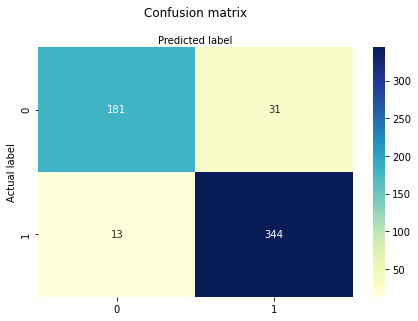

In [39]:
# Original weights -- just to compare
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

clf = LogisticRegressionCV(cv=10, random_state=42, max_iter=5000, solver="saga").fit(X, y)
y_pred = clf.predict(X)
print(classification_report(y, y_pred, target_names= dataset["target_names"]))

print(f"ROC AUC score is {np.round(roc_auc_score(y, y_pred), 2)}")

cnf_matrix = confusion_matrix(y, y_pred)
plot_confusion_matrix(cnf_matrix)

              precision    recall  f1-score   support

   malignant       0.90      0.89      0.89       212
      benign       0.93      0.94      0.94       357

    accuracy                           0.92       569
   macro avg       0.91      0.91      0.91       569
weighted avg       0.92      0.92      0.92       569

ROC AUC score is 0.91


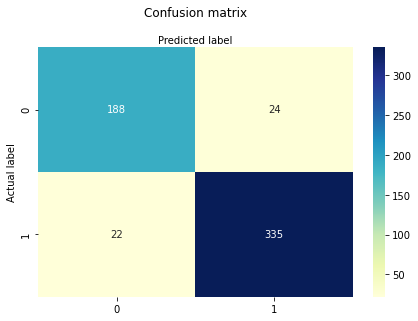

In [46]:
# Adjust the class weight of M and L and retrain the model again to bias toward Malignant
# using the relative weight of M and L as 2:1

# Weight M:L 2:1

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

clf = LogisticRegressionCV(cv=10, random_state=42, solver="saga", max_iter= 5000, class_weight={0:2, 1:1}).fit(X, y)
y_pred = clf.predict(X)
print(classification_report(y, y_pred, target_names= dataset["target_names"]))

# Let's also print Roc Auc scores (to check these shouldn't change as weights change)
print(f"ROC AUC score is {np.round(roc_auc_score(y, y_pred), 2)}")

cnf_matrix = confusion_matrix(y, y_pred)
plot_confusion_matrix(cnf_matrix)

              precision    recall  f1-score   support

   malignant       0.80      0.95      0.87       212
      benign       0.97      0.86      0.91       357

    accuracy                           0.89       569
   macro avg       0.88      0.90      0.89       569
weighted avg       0.90      0.89      0.89       569

ROC AUC score is 0.9


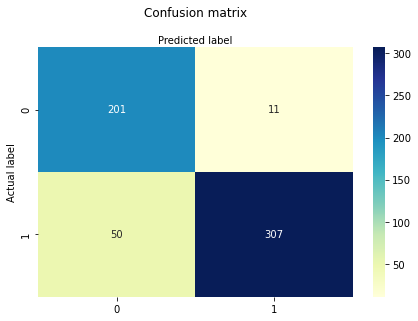

In [43]:
# Weight M:L 5:1

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

clf = LogisticRegressionCV(cv=10, random_state=42, solver="saga", max_iter= 5000, class_weight={0:5, 1:1}).fit(X, y)
y_pred = clf.predict(X)
print(classification_report(y, y_pred, target_names= dataset["target_names"]))

print(f"ROC AUC score is {np.round(roc_auc_score(y, y_pred), 2)}")

cnf_matrix = confusion_matrix(y, y_pred)
plot_confusion_matrix(cnf_matrix)

              precision    recall  f1-score   support

   malignant       0.73      0.98      0.83       212
      benign       0.98      0.78      0.87       357

    accuracy                           0.85       569
   macro avg       0.85      0.88      0.85       569
weighted avg       0.89      0.85      0.86       569

ROC AUC score is 0.88


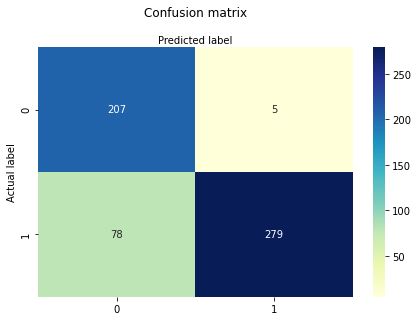

In [44]:
# Weight M:L 10:1

from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report

clf = LogisticRegressionCV(cv=10, random_state=42, solver="saga", max_iter=5000, class_weight={0:10, 1:1}).fit(X, y)
y_pred = clf.predict(X)
print(classification_report(y, y_pred, target_names= dataset["target_names"]))

print(f"ROC AUC score is {np.round(roc_auc_score(y, y_pred), 2)}")

cnf_matrix = confusion_matrix(y, y_pred)
plot_confusion_matrix(cnf_matrix)

Findings:

- As expected, ROC AUC scores remained the same despite the class imbalance, confirming that ROC is insensitive to class distribution/unbalanced datasets.
- For the distribution of 2:1 M:L, accuracy was the same that with the original weights. This is because the original weights were similar to 1:2 M:L (almost 400 cases vs 200)
- As we increased our biased towards malignant cases, the accuracy decreased as well. This is expected since as mentioned before accuracy does not perform well on unbalanced datasets.
- Regarding both precision and accuracy macro averages, they also decreased as the dataset became more unbalanced. 
- When looking deeper into the metrics, the recall for malignant cases increased as the weights for this class became higher. On the contrary, the precision for this class decreased. 
- Overall, there was an increase in predicting benign cases as malignant (false negatives)

Comment:

- The reason why a bias towards maligant cases generated a better recall for this class and less precision is because recall considers only true positives and false negatives (actual positives). So, within a dataset heavily weighted to malignant values (those that are 0 in this case), the model would bias its estimates towards these values by increasing the number of false negatives predictions (there are more and more benign cases predicted as malignant, and very small number of malignant predicted as benign)
- The same logic applies with precision. If our model is biased towards malignant cases, there are probably going to be less false positives (less malignant cases predicted as benign)
- As we have studied, there is a tradeoff between precision and recall.
- Changing the solver type helped converge, otherwise an error stated that max iterations were reached for the lbgfs solver